### Importing required libraries ###

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data and storing in df ###

In [3]:
df = pd.read_csv('bmc_waste_festival_ml_data.csv')
df.head()

,ward_id,ward_name,zone,month,day_of_month,is_festival_window,festival_intensity,complaint_intensity,crowd_index,weather_risk,wpi
0,W003,Andheri East,West,12,28,0,0.06,72,60,50,31
1,X005,Andheri West,West,9,11,1,0.85,152,107,43,58
2,W006,Borivali,North,4,21,0,0.02,45,55,38,23
3,W002,Bandra West,West,7,6,0,0.13,32,95,16,27
4,W001,Colaba,South,3,22,1,0.95,168,107,56,63


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ward_id              2500 non-null   object 
 1   ward_name            2500 non-null   object 
 2   zone                 2500 non-null   object 
 3   month                2500 non-null   int64  
 4   day_of_month         2500 non-null   int64  
 5   is_festival_window   2500 non-null   int64  
 6   festival_intensity   2500 non-null   float64
 7   complaint_intensity  2500 non-null   int64  
 8   crowd_index          2500 non-null   int64  
 9   weather_risk         2500 non-null   int64  
 10  wpi                  2500 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 215.0+ KB


### EDA ###

<Axes: xlabel='festival_intensity', ylabel='wpi'>

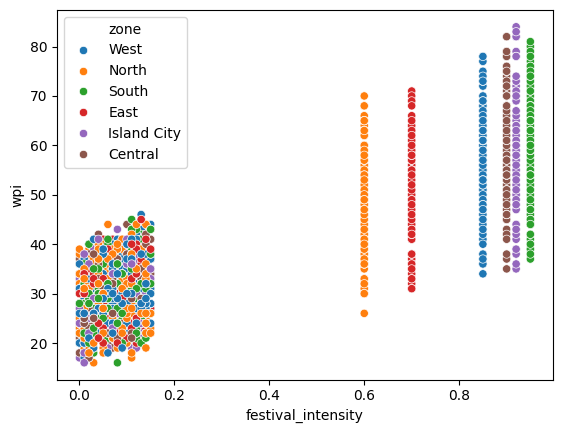

In [5]:
sns.scatterplot(x='festival_intensity', y='wpi', hue='zone', data=df)

C:\Users\Poorvaja\AppData\Local\Temp\ipykernel_11792\3440227263.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='zone', y='wpi', data=df, palette='coolwarm')


<Axes: xlabel='zone', ylabel='wpi'>

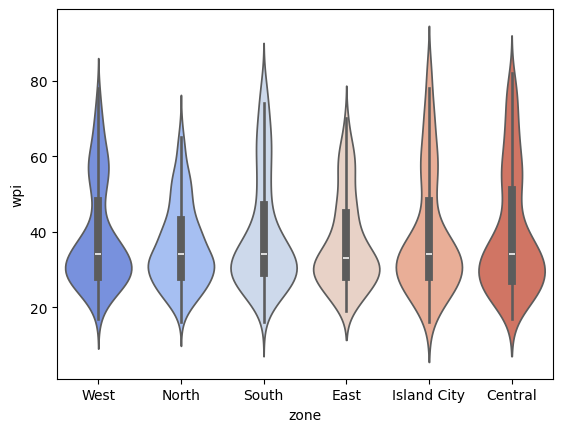

In [6]:
sns.violinplot(x='zone', y='wpi', data=df, palette='coolwarm')

<Axes: >

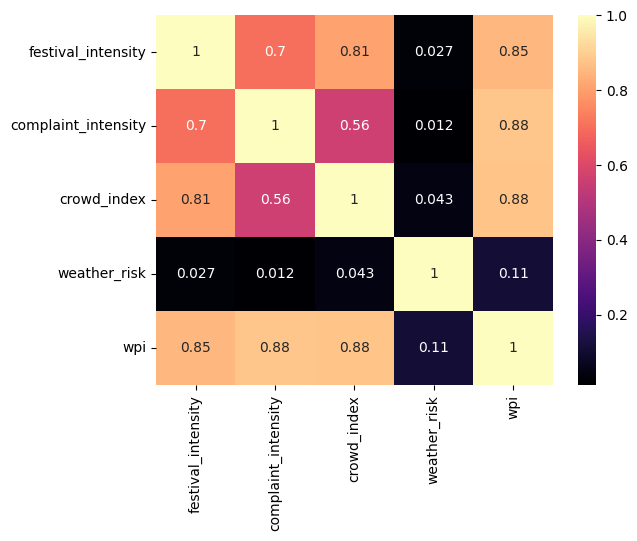

In [7]:
corr = df[['festival_intensity','complaint_intensity', 'crowd_index','weather_risk', 'wpi']].corr()
sns.heatmap(data=corr, annot=True, cmap='magma')

### Encode ward_name and zone ###

In [8]:
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()

df['ward_coded']=encoder.fit_transform(df['ward_name'])
df.head()

,ward_id,ward_name,zone,month,day_of_month,is_festival_window,festival_intensity,complaint_intensity,crowd_index,weather_risk,wpi,ward_coded
0,W003,Andheri East,West,12,28,0,0.06,72,60,50,31,0
1,X005,Andheri West,West,9,11,1,0.85,152,107,43,58,1
2,W006,Borivali,North,4,21,0,0.02,45,55,38,23,3
3,W002,Bandra West,West,7,6,0,0.13,32,95,16,27,2
4,W001,Colaba,South,3,22,1,0.95,168,107,56,63,6


In [9]:
import joblib
joblib.dump(encoder, 'ward_encoder.pkl')

['ward_encoder.pkl']

In [10]:
zone_coded = pd.get_dummies(data=df['zone'],prefix='zone' ,drop_first=True)
df = pd.concat([df, zone_coded], axis=1)
df.head()

,ward_id,ward_name,zone,month,day_of_month,is_festival_window,festival_intensity,complaint_intensity,crowd_index,weather_risk,wpi,ward_coded,zone_East,zone_Island City,zone_North,zone_South,zone_West
0,W003,Andheri East,West,12,28,0,0.06,72,60,50,31,0,False,False,False,False,True
1,X005,Andheri West,West,9,11,1,0.85,152,107,43,58,1,False,False,False,False,True
2,W006,Borivali,North,4,21,0,0.02,45,55,38,23,3,False,False,True,False,False
3,W002,Bandra West,West,7,6,0,0.13,32,95,16,27,2,False,False,False,False,True
4,W001,Colaba,South,3,22,1,0.95,168,107,56,63,6,False,False,False,True,False


### Model-training ###

In [11]:
df.columns

Index(['ward_id', 'ward_name', 'zone', 'month', 'day_of_month',
       'is_festival_window', 'festival_intensity', 'complaint_intensity',
       'crowd_index', 'weather_risk', 'wpi', 'ward_coded', 'zone_East',
       'zone_Island City', 'zone_North', 'zone_South', 'zone_West'],
      dtype='object')

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

X = df[['month', 'day_of_month','is_festival_window', 'festival_intensity', 'complaint_intensity',
       'crowd_index', 'weather_risk', 'ward_coded', 'zone_East','zone_North', 'zone_South', 'zone_West']]

y = df['wpi']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1750, 12) (750, 12) (1750,) (750,)


In [13]:
rfr = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=200, random_state=42)

In [14]:
y_pred = rfr.predict(X_test)
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("R2-Score: ", r2_score(y_test, y_pred))

MAE:  0.6512829026712135
R2-Score:  0.9960546315117597


In [15]:
print("Training WPI min:", y_train.min(), "max:", y_train.max())
print("Test WPI min:", y_test.min(), "max:", y_test.max())
print("Predictions min:", y_pred.min(), "max:", y_pred.max())

Training WPI min: 16 max: 84
Test WPI min: 16 max: 82
Predictions min: 17.33 max: 80.235


### Saving Model ###

In [16]:
import joblib
joblib.dump(rfr, 'rfr_model.pkl')
print("Model saved!")

Model saved!
